In [1]:
import pandas as pd
from skimage.segmentation import slic,quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from PIL import Image
import numpy as np
from skimage.future import graph
import networkx

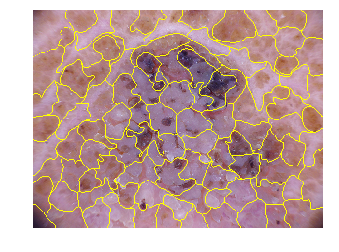

In [4]:
path="/home/sirzechlucifer/Work/CVPR_graphs/ISIC2018_input/ISIC_0024623.jpg"
image = img_as_float(io.imread(path))
segments = slic(image, n_segments = 100, sigma = 5)
# segments=quickshift(image,ratio=1, kernel_size=5, max_dist=10, sigma=0)
rag = graph.rag_mean_color(image, segments)
fig = plt.figure("Superpixels -- %d segments" % (100))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.show()

In [16]:
networkx.to_numpy_matrix(rag).shape

(48, 48)

In [4]:
import skimage
image=skimage.transform.resize(image, (224,224,1), mode='constant')

In [5]:
[(n, nbrdict) for n, nbrdict in rag.adjacency()]

[(0,
  {1: {'weight': 0.09257576212830027}, 20: {'weight': 0.11185860381327203}}),
 (1,
  {0: {'weight': 0.09257576212830027},
   2: {'weight': 0.22965044242333807},
   14: {'weight': 0.0889425202840567},
   20: {'weight': 0.026137996927915293}}),
 (2,
  {1: {'weight': 0.22965044242333807},
   3: {'weight': 0.0898039832844881},
   14: {'weight': 0.14178402789952663}}),
 (3,
  {2: {'weight': 0.0898039832844881},
   4: {'weight': 0.14709445120987696},
   14: {'weight': 0.05345848962106086},
   5: {'weight': 0.08298423758377774},
   15: {'weight': 0.2511677988568938},
   22: {'weight': 0.11316720296672308}}),
 (4, {3: {'weight': 0.14709445120987696}, 5: {'weight': 0.227281805224118}}),
 (5,
  {4: {'weight': 0.227281805224118},
   6: {'weight': 0.21024174659729294},
   12: {'weight': 0.05134936661293703},
   3: {'weight': 0.08298423758377774},
   15: {'weight': 0.3338564741983158}}),
 (6,
  {5: {'weight': 0.21024174659729294},
   7: {'weight': 0.12215515661084904},
   12: {'weight': 0.2350

In [7]:
rag.adjacency().to_numpy_matrix()

AttributeError: 'dict_itemiterator' object has no attribute 'to_numpy_matrix'

In [10]:
rag.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97))

In [14]:
rag.nodes_with_selfloops

<bound method Graph.nodes_with_selfloops of <skimage.future.graph.rag.RAG object at 0x7efe564ee710>>

In [2]:
labels=pd.read_csv("/home/sirzechlucifer/Work/CVPR_graphs/ISIC2018_target/ISIC2018_Task3_Training_GroundTruth.csv")

In [3]:
labels.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels.groupby("MEL").count()["image"]

MEL
0.0    8902
1.0    1113
Name: image, dtype: int64

In [5]:
labels.groupby("NV").count()["image"]

NV
0.0    3310
1.0    6705
Name: image, dtype: int64

In [6]:
labels.groupby("BCC").count()["image"]

BCC
0.0    9501
1.0     514
Name: image, dtype: int64

In [7]:
labels.groupby("AKIEC").count()["image"]

AKIEC
0.0    9688
1.0     327
Name: image, dtype: int64

In [8]:
labels.groupby("BKL").count()["image"]

BKL
0.0    8916
1.0    1099
Name: image, dtype: int64

In [9]:
labels.groupby("DF").count()["image"]

DF
0.0    9900
1.0     115
Name: image, dtype: int64

In [10]:
labels.groupby("VASC").count()["image"]

VASC
0.0    9873
1.0     142
Name: image, dtype: int64

In [11]:
import os

In [12]:
nv_list=list()
for index,row in labels.iterrows():
    if row["NV"]==1.0:
        nv_list.append(row["image"])
        

In [13]:
nv_list

['ISIC_0024306',
 'ISIC_0024307',
 'ISIC_0024308',
 'ISIC_0024309',
 'ISIC_0024311',
 'ISIC_0024314',
 'ISIC_0024316',
 'ISIC_0024317',
 'ISIC_0024319',
 'ISIC_0024320',
 'ISIC_0024321',
 'ISIC_0024322',
 'ISIC_0024325',
 'ISIC_0024326',
 'ISIC_0024327',
 'ISIC_0024328',
 'ISIC_0024334',
 'ISIC_0024335',
 'ISIC_0024339',
 'ISIC_0024340',
 'ISIC_0024341',
 'ISIC_0024342',
 'ISIC_0024343',
 'ISIC_0024344',
 'ISIC_0024346',
 'ISIC_0024347',
 'ISIC_0024348',
 'ISIC_0024349',
 'ISIC_0024350',
 'ISIC_0024352',
 'ISIC_0024353',
 'ISIC_0024354',
 'ISIC_0024355',
 'ISIC_0024356',
 'ISIC_0024357',
 'ISIC_0024359',
 'ISIC_0024361',
 'ISIC_0024362',
 'ISIC_0024363',
 'ISIC_0024364',
 'ISIC_0024365',
 'ISIC_0024366',
 'ISIC_0024368',
 'ISIC_0024369',
 'ISIC_0024373',
 'ISIC_0024374',
 'ISIC_0024376',
 'ISIC_0024377',
 'ISIC_0024378',
 'ISIC_0024379',
 'ISIC_0024380',
 'ISIC_0024384',
 'ISIC_0024385',
 'ISIC_0024387',
 'ISIC_0024388',
 'ISIC_0024389',
 'ISIC_0024390',
 'ISIC_0024391',
 'ISIC_0024392

In [14]:
from shutil import copy2
deleted_images=list()
j=0
for i in nv_list:
    if j<5195:
        copy2("ISIC2018_input/"+i+".jpg","ISIC2018_new")
        os.remove("ISIC2018_input/"+i+".jpg")
        deleted_images.append(i)
        j=j+1
    else:
        break

In [19]:
new_train=pd.read_csv("/home/sirzechlucifer/Work/CVPR_graphs/ISIC2018_target/ISIC2018_Task3_Training_GroundTruth_1.csv")

In [20]:
drop_index=list()
for index,row in new_train.iterrows():
    if row["image"].split(".")[0] in deleted_images:
        drop_index.append(index)

In [22]:
new_train.drop(new_train.index[drop_index],inplace=True)

In [24]:
new_train.shape

(4820, 8)

In [25]:
len(deleted_images)

5195

In [26]:
new_train.to_csv("/home/sirzechlucifer/Work/CVPR_graphs/ISIC2018_target/ISIC2018_Task3_Training_GroundTruth_1.csv",index=False)